In [2]:
from modules import *
from functions import *

In [3]:
def get_metrics(N, n_trials, theta_stim, POs):
    preferences = np.array(POs).T 
    # initial_preferences = preferences[:, 0] 
    initial_preferences = np.linspace(0, 180, N)
    drift_magnitude = np.array([circular_distance(preferences[:, day], initial_preferences) for day in range(n_trials)])
    drift_rate = np.array([circular_distance(preferences[:, day+1], preferences[:, day]) for day in range(n_trials-1)])
    initial_distances = np.abs(initial_preferences - theta_stim)
    distances = np.abs(preferences - theta_stim)
    convergence = np.array([initial_distances - distances[:, day] for day in range(n_trials-1)])
    return drift_magnitude, drift_rate, convergence

    

In [4]:
def prerun(W, n_trials, n_thetas):

    W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

    for trial in range(n_trials):
        W_old = W[:, :, trial]
        H = hebbian_component(N, W_old, n_thetas, theta_stim, type='baseline')
        eta = abs(np.random.randn(N, N))
        W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
        normalisation(W_new)
        W[:, :, trial+1] = W_new

    return W[:, :, -1]

In [32]:
N = int(1000)
n_trials = 31
n_trials_prerun = 50
n_stim_per_trial = 100

learning_rate = 1
theta_stim = 90
n_test_angles = 100

vars = np.random.lognormal(2, 0.6, N)
rand_scaling = 1
hebb_scaling = 0.3
a=10
b=10

W_init = initialise_W(N, vars)
W_init = prerun(W_init, n_trials_prerun, n_stim_per_trial)

""" Baseline """ 

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

# Run trials
for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='baseline')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_baseline, drift_rate_baseline, convergence_baseline = get_metrics(N, n_trials, theta_stim, POs)


# """ 7 day stripe-rearing """ 

# n_total = 10
# n_stim_per_test = 80
# n_repeats = int(n_total / n_stim_per_test)

# POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

# # Run trials
# for trial in range(n_trials):
#     W_old = W[:, :, trial]
#     if trial % 7 == 0 and trial != 0:
#         w = W_old
#         for repeat in range(n_repeats):
#             H = hebbian_component(N, w, n_stim_per_test, theta_stim, type='test')
#             eta = abs(np.random.randn(N, N))
#             w += (hebb_scaling * H * propensity_hebb(w, a) + rand_scaling * eta * propensity_rand(w, b)) * learning_rate
#             normalisation(w)
#         W_new = w
#     else:
#         H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='stripe_rearing')
#         eta = abs(np.random.randn(N, N))
#         W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
#         normalisation(W_new)
#     W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

# drift_magnitude_7, drift_rate_7, convergence_7 = get_metrics(N, n_trials, theta_stim, POs)


""" 28 day stripe-rearing """

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

# Run trials
for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='stripe_rearing')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_28, drift_rate_28, convergence_28 = get_metrics(N, n_trials, theta_stim,POs)

(0.0, 30.0)

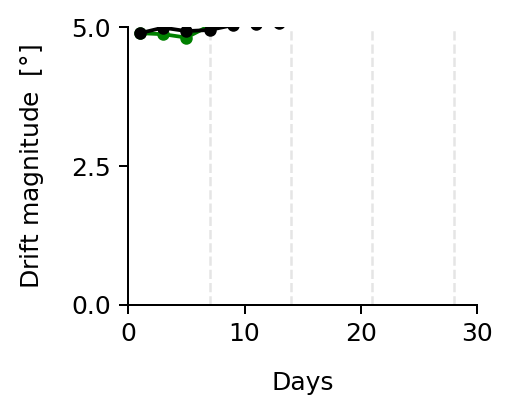

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
eo = 2
# ax.plot(np.arange(1, n_trials+1)[::eo], np.median(drift_magnitude_7, axis=1)[::eo], c='orange', ls='-', marker='o', ms=4, label='Deprivation 7 days')
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_28[:-1], axis=1)[::eo], c='green', ls='-', marker='o', ms=4, label='Deprivation 28 days')
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_baseline[:-1], axis=1)[::eo], c='black', ls='-', marker='o', ms=4, label='Baseline')

ax.set_ylim([0, 5])
ax.set_xlim([0, n_trials+1])
for x in np.arange(7, n_trials, 7): ax.axvline(x=x, c='k', ls='--', alpha=0.1, lw=1)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel('Drift magnitude $ \; [\degree]$')
ax.set_xlim(0, 30)
# ax.legend(loc='best', frameon=False, fontsize=8)

# plt.savefig('figures/magnitude_vs_7_days.svg')

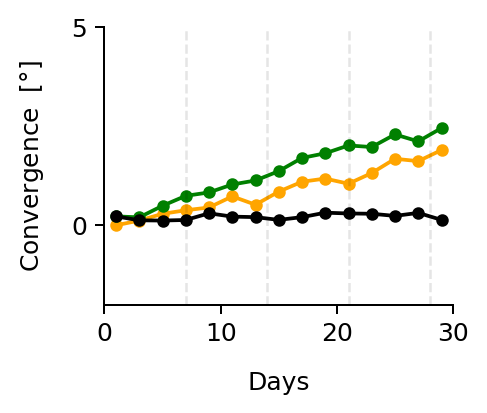

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], seven_days, c='orange', ls='-', marker='o', ms=4)
# ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_7, axis=1)[::eo], c='orange', ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_28, axis=1)[::eo]-0.3, c='green', ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_baseline, axis=1)[::eo]-0.3, c='black', ls='-', marker='o', ms=4)

ax.set_ylim([-2, 5]); ax.set_xlim(0, 30)
for x in np.arange(7, n_trials, 7): ax.axvline(x=x, c='k', ls='--', alpha=0.1, lw=1)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel(r'Convergence $ \; [\degree]$')

# plt.savefig('figures/convergence_7_days.svg')

Text(0, 0.5, 'Drift rate $ \\; [\\degree / $ day $]$')

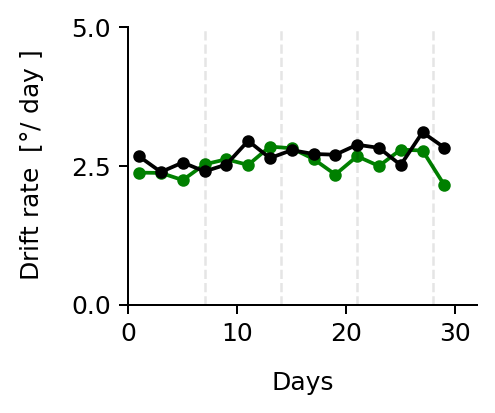

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
eo=2
offset = 1
# ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_7, axis=1)[::eo], c='orange', ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_28, axis=1)[::eo]-offset, c='green', ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_baseline, axis=1)[::eo]-offset, c='black', ls='-', marker='o', ms=4)
ax.set_ylim([0, 5]); ax.set_xlim([0, n_trials+1])
for x in np.arange(7, n_trials, 7): ax.axvline(x=x, c='k', ls='--', alpha=0.1, lw=1)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel(r'Drift rate $ \; [\degree / $ day $]$')

# plt.savefig('figures/rate_vs_days.svg')

In [117]:
N = int(500)
n_trials = 31
n_trials_prerun = 0
n_stim_per_trial = 100

learning_rate = 1
theta_stim = 90
n_test_angles = 100

vars = np.random.lognormal(2, 0.6, N)

a=10
b=10

W_init = initialise_W(N, vars)
W_init = prerun(W_init, n_trials_prerun, n_stim_per_trial)

""" ----------  BASELINE ---------- """

""" Hebbian only """ 

rand_scaling = 0
hebb_scaling = 1.3

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='baseline')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_baseline_hebb, drift_rate_baseline_hebb, convergence_baseline_hebb = get_metrics(N, n_trials, theta_stim, POs)

""" Random only """

rand_scaling = 1.3
hebb_scaling = 0

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='baseline')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_baseline_rand, drift_rate_baseline_rand, convergence_baseline_rand = get_metrics(N, n_trials, theta_stim, POs)

""" Optimal """

rand_scaling = 1
hebb_scaling = 0.3

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='baseline')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_baseline_opt, drift_rate_baseline_opt, convergence_baseline_opt = get_metrics(N, n_trials, theta_stim, POs)



""" ----------  STRIPE-REARING ---------- """

""" Hebbian only """ 

rand_scaling = 0
hebb_scaling = 1.3

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='stripe_rearing')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_sr_hebb, drift_rate_sr_hebb, convergence_sr_hebb = get_metrics(N, n_trials, theta_stim, POs)

""" Random only """

rand_scaling = 1.3
hebb_scaling = 0

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='stripe_rearing')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_sr_rand, drift_rate_sr_rand, convergence_sr_rand = get_metrics(N, n_trials, theta_stim, POs)

""" Optimal """

rand_scaling = 1
hebb_scaling = 0.3

POs = []; W = np.zeros((N, N, n_trials+1)); W[:, :, 0] = W_init

for trial in range(n_trials):
    W_old = W[:, :, trial]
    H = hebbian_component(N, W_old, n_stim_per_trial, theta_stim, type='stripe_rearing')
    eta = abs(np.random.randn(N, N))
    W_new = W_old + (hebb_scaling * H * propensity_hebb(W_old, a) + rand_scaling * eta * propensity_rand(W_old, b)) * learning_rate
    normalisation(W_new)
    W[:, :, trial+1] = W_new; PO = get_preferred_orientations(N, W_old, n_angles=n_test_angles); POs.append(PO)

drift_magnitude_sr_opt, drift_rate_sr_opt, convergence_sr_opt = get_metrics(N, n_trials, theta_stim, POs)

In [49]:
hebb_color = '#709920'
rand_color = '#DF8927'
opt_color = 'black'

Text(0, 0.5, 'Drift magnitude $ \\; [\\degree]$')

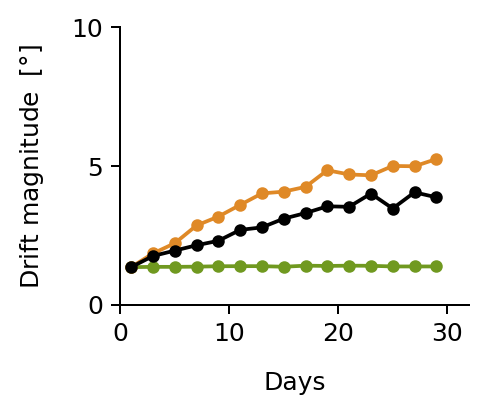

In [118]:
eo=2
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_baseline_hebb[:-1], axis=1)[::eo], c=hebb_color, ls='-', marker='o', ms=4, label='Hebbian only')
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_baseline_rand[:-1], axis=1)[::eo], c=rand_color, ls='-', marker='o', ms=4, label='Random only')
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_baseline_opt[:-1], axis=1)[::eo], c=opt_color, ls='-', marker='o', ms=4, label='Optimal')
ax.locator_params(axis='y', nbins=2)
ax.set_ylim([0, 10]); ax.set_xlim([0, n_trials+1])
ax.set_xlabel('Days')
ax.set_ylabel('Drift magnitude $ \; [\degree]$')

# plt.savefig('figures/knockout_baseline_mag_vs_day.svg')


Text(0, 0.5, 'Drift rate $ \\; [\\degree / $ day $]$')

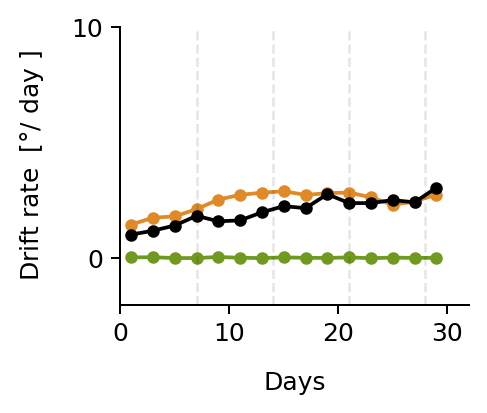

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_baseline_hebb, axis=1)[::eo], c=hebb_color, ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_baseline_rand, axis=1)[::eo], c=rand_color, ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_baseline_opt, axis=1)[::eo], c=opt_color, ls='-', marker='o', ms=4)

ax.set_ylim([-2, 10]); ax.set_xlim([0, n_trials+1])
for x in np.arange(7, n_trials, 7): ax.axvline(x=x, c='k', ls='--', alpha=0.1, lw=1)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel(r'Drift rate $ \; [\degree / $ day $]$')

# plt.savefig('figures/knockout_baseline_rate_vs_day.svg')

Text(0, 0.5, 'Convergence $ \\; [\\degree]$')

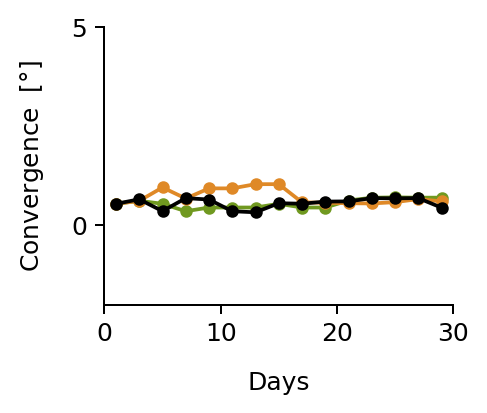

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_baseline_hebb, axis=1)[::eo], c=hebb_color, ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_baseline_rand, axis=1)[::eo], c=rand_color, ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_baseline_opt, axis=1)[::eo], c=opt_color, ls='-', marker='o', ms=4)
ax.set_ylim([-2, 5]); ax.set_xlim(0, 30)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel(r'Convergence $ \; [\degree]$')


Text(0, 0.5, 'Drift magnitude $ \\; [\\degree]$')

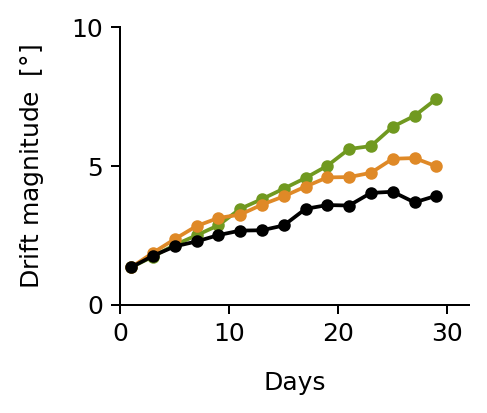

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_sr_hebb[:-1], axis=1)[::eo], c=hebb_color, ls='-', marker='o', ms=4, label='Hebbian only')
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_sr_rand[:-1], axis=1)[::eo], c=rand_color, ls='-', marker='o', ms=4, label='Random only')
ax.plot(np.arange(1, n_trials)[::eo], np.median(drift_magnitude_sr_opt[:-1], axis=1)[::eo], c=opt_color, ls='-', marker='o', ms=4, label='Optimal')
ax.locator_params(axis='y', nbins=2)
ax.set_ylim([0, 10]); ax.set_xlim([0, n_trials+1])
ax.set_xlabel('Days')
ax.set_ylabel('Drift magnitude $ \; [\degree]$')


Text(0, 0.5, 'Drift rate $ \\; [\\degree / $ day $]$')

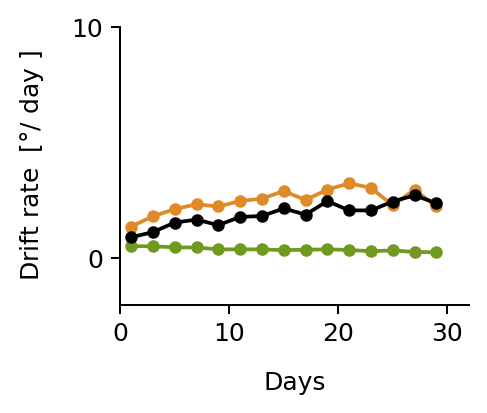

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_sr_hebb, axis=1)[::eo], c=hebb_color, ls='-', marker='o', ms=4, label='Hebbian only')
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_sr_rand, axis=1)[::eo], c=rand_color, ls='-', marker='o', ms=4, label='Random only')
ax.plot(np.arange(1, n_trials)[::eo], np.mean(drift_rate_sr_opt, axis=1)[::eo], c=opt_color, ls='-', marker='o', ms=4, label='Model')

ax.set_ylim([-2, 10]); ax.set_xlim([0, n_trials+1])
# for x in np.arange(7, n_trials, 7): ax.axvline(x=x, c='k', ls='--', alpha=0.1, lw=1)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel(r'Drift rate $ \; [\degree / $ day $]$')
# ax.legend()


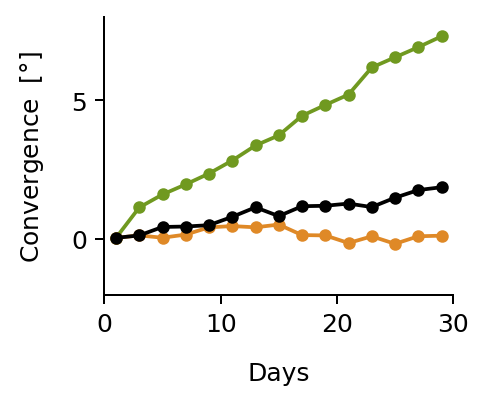

In [132]:
offset = 0.5
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2), dpi=180)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_sr_hebb, axis=1)[::eo]-offset, c=hebb_color, ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_sr_rand, axis=1)[::eo]-offset, c=rand_color, ls='-', marker='o', ms=4)
ax.plot(np.arange(1, n_trials)[::eo], np.median(convergence_sr_opt, axis=1)[::eo]-offset, c=opt_color, ls='-', marker='o', ms=4)
ax.set_ylim([-2, 8]); ax.set_xlim(0, 30)
ax.locator_params(axis='y', nbins=2)
ax.set_xlabel('Days')
ax.set_ylabel(r'Convergence $ \; [\degree]$')

# plt.savefig('figures/knockout_deprivation_convergence_vs_day.svg')

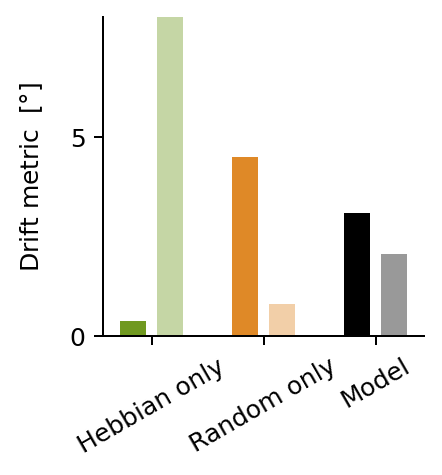

In [131]:
colors = [hebb_color, rand_color, opt_color]

magnitude_values = [np.median(drift_magnitude_baseline_hebb[-1])-offset, np.median(drift_magnitude_baseline_rand[-1])-offset, np.median(drift_magnitude_baseline_opt[-1])-offset]
convergence_values = [np.median(convergence_sr_hebb[-1]), np.median(convergence_sr_rand[-1]), np.median(convergence_sr_opt[-1])]

offset = 1
fig, ax = plt.subplots(1, 1, figsize=(2.3, 2.3), dpi=180)
ax.bar([0, 3, 6], magnitude_values, color=colors, alpha=1, width=0.7, label='Magnitude')
ax.bar([1, 4, 7], convergence_values, color=colors, alpha=0.4, width=0.7, label='Convergence')
ax.set_xticks([0.5, 3.5, 6.5]); ax.set_xlim([-0.8, 7.8]); ax.set_ylim([0, 8]); ax.set_yticks([0, 5])
ax.set_xticklabels(['Hebbian only', 'Random only', 'Model'], rotation=30)
ax.set_ylabel('Drift metric $ \; [\degree]$')

plt.savefig('figures/knockout_comparison.svg')
